In [ ]:
! python --version

### Download the paper "Attention is All You Need" from the following link:

In [ ]:
# ! wget https://arxiv.org/pdf/1706.03762.pdf -O ../data/attention_is_all_you_need.pdf

In [1]:
from unstructured.partition.pdf import partition_pdf

output_path = "../data/"
file_path = output_path + "attention_is_all_you_need.pdf"

# Reference: https://docs.unstructured.io/open-source/core-functionality/chunking
chunks = partition_pdf(
    filename=file_path,
    infer_table_structure=True,             # extract tables
    strategy="hi_res",                      # mandatory to infer tables
    extract_image_block_types=["Image", "Table"],    # Add 'Table' to list to extract image of tables
    extract_image_block_to_payload=True,    # if true, will extract base64 for API usage
    chunking_strategy="by_title",           # or 'basic'
    max_characters=10000,                   # defaults to 500
    combine_text_under_n_chars=2000,        # defaults to 0
    new_after_n_chars=6000,
)

/Users/josereyes/Dev/multimodal-rag-pdf/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
len(chunks)

12

In [3]:
set([str(type(el)) for el in chunks])

{"<class 'unstructured.documents.elements.CompositeElement'>"}

In [4]:
import json


for i in range(5):
    print(json.dumps(chunks[i].to_dict(), indent=2))

{
  "type": "CompositeElement",
  "element_id": "16295d088ec2873d994ec321914a566e",
  "text": "3\n\n2023\n\n2\n\n0\n\n2\n\ng u A 2 ] L C . s c [ 7 v 2 6 7 3 0 . 6 0\n\n7\n\n1\n\n:\n\nv\n\narXiv\n\ni\n\nX\n\nr\n\na\n\nProvided proper attribution is provided, Google hereby grants permission to reproduce the tables and figures in this paper solely for use in journalistic or scholarly works.\n\nAttention Is All You Need\n\nAshish Vaswani\u2217\n\nGoogle Brain\n\navaswani@google.com\n\nNoam Shazeer\u2217 Google Brain noam@google.com\n\nNiki Parmar\u2217 Google Research nikip@google.com\n\nJakob Uszkoreit\u2217\n\nGoogle Research usz@google.com\n\nLlion Jones\u2217\n\nGoogle Research llion@google.com\n\nAidan N. Gomez\u2217 \u2020 University of Toronto aidan@cs.toronto.edu\n\n\u0141ukasz Kaiser\u2217 Google Brain lukaszkaiser@google.com\n\nIllia Polosukhin\u2217 \u2021\n\nillia.polosukhin@gmail.com\n\nAbstract\n\nThe dominant sequence transduction models are based on complex recurrent or con

In [5]:
chunks[5].metadata.orig_elements[8].to_dict()

{'type': 'Table',
 'element_id': '2e3d2bb2-286f-465f-bfff-1708c8b9b310',
 'text': 'Layer Type Complexity per Layer Sequential Maximum Path Length Operations Self-Attention O(n2 · d) O(1) O(1) Recurrent O(n · d2) O(n) O(n) Convolutional O(k · n · d2) O(1) O(logk(n)) Self-Attention (restricted) O(r · n · d) O(1) O(n/r)',
 'metadata': {'detection_class_prob': 0.928255021572113,
  'coordinates': {'points': ((320.3292541503906, 312.45477294921875),
    (320.3292541503906, 519.1640014648438),
    (1363.9827880859375, 519.1640014648438),
    (1363.9827880859375, 312.45477294921875)),
   'system': 'PixelSpace',
   'layout_width': 1700,
   'layout_height': 2200},
  'last_modified': '2024-04-13T09:47:34',
  'text_as_html': '<table><thead><tr><th>Layer Type</th><th>Complexity per Layer</th><th>Sequential Operations</th><th>Maximum Path Length</th></tr></thead><tbody><tr><td>Self-Attention</td><td>O(n? - d)</td><td>O(1)</td><td>O(1)</td></tr><tr><td>Recurrent</td><td>O(n- d?)</td><td>O(n)</td><td>

In [6]:
elements = chunks[3].metadata.orig_elements
chunk_images = [el for el in elements if 'Image' in str(type(el))]
chunk_images[0].to_dict()

{'type': 'Image',
 'element_id': '3887813b-2d53-4f7c-9d00-e4b92a381949',
 'text': '',
 'metadata': {'coordinates': {'points': ((486.0, 261.1805555555558),
    (486.0, 614.7805555555556),
    (664.0, 614.7805555555556),
    (664.0, 261.1805555555558)),
   'system': 'PixelSpace',
   'layout_width': 1700,
   'layout_height': 2200},
  'last_modified': '2024-04-13T09:47:34',
  'filetype': 'PPM',
  'languages': ['eng'],
  'page_number': 4,
  'image_base64': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAFiALIDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQE

In [7]:
# separate tables from texts
tables_info = []
composites = []

for chunk in chunks:
    if "CompositeElement" in str(type((chunk))):
        composites.append(chunk)

In [8]:
# Get the images from the CompositeElement objects
def get_images_base64(chunks):
    images_b64 = []
    for chunk in chunks:
        if "CompositeElement" in str(type(chunk)):
            chunk_els = chunk.metadata.orig_elements
            for el in chunk_els:
                if "Image" in str(type(el)):
                    images_b64.append(el.metadata.image_base64)
    return images_b64

images = get_images_base64(chunks)

In [9]:

def get_tables_info(chunks):
    tables_info = []
    for chunk in chunks:
        if "CompositeElement" in str(type(chunk)):
            chunk_elements = chunk.metadata.orig_elements
            for el in chunk_elements:
                if "Table" in str(type(el)):
                    tables_info.append(
                        {
                            "text_as_html": el.metadata.text_as_html,
                            "image_base64": el.metadata.image_base64,
                        })
    return tables_info

tables_info = get_tables_info(chunks)

In [10]:
len(tables_info)

4

In [11]:
tables_info[3]

{'text_as_html': '<table><thead><tr><th>Parser</th><th>Training</th><th>WSJ 23 F1</th></tr></thead><tbody><tr><td>Vinyals &amp; Kaiser el al. (2014)</td><td>WSJ only, discriminative</td><td>88.3</td></tr><tr><td>Petrov et al. (2006)</td><td>WSJ only, discriminative</td><td>90.4</td></tr><tr><td>Zhu et al. (2013) (40)</td><td>WSJ only, discriminative</td><td>90.4</td></tr><tr><td>Dyer et al. (2016)</td><td>WSJ only, discriminative</td><td>91.7</td></tr><tr><td>Transformer (4 layers)</td><td>WSJ only, discriminative</td><td>91.3</td></tr><tr><td>Zhu et al. (2013) [40]</td><td>semi-supervised</td><td>913</td></tr><tr><td>Huang &amp; Harper (2009)</td><td>semi-supervised</td><td>91.3</td></tr><tr><td>McClosky et al. (2006)</td><td>semi-supervised</td><td>92.1</td></tr><tr><td>Vinyals &amp; Kaiser el al. (2014)</td><td>semi-supervised</td><td>92.1</td></tr><tr><td>Transformer (4 layers)</td><td>semi-supervised</td><td>92.7</td></tr><tr><td>Luong et al. (2015) 23]</td><td>multi-task</td><td>

In [12]:
tables_info[3]["text_as_html"]

'<table><thead><tr><th>Parser</th><th>Training</th><th>WSJ 23 F1</th></tr></thead><tbody><tr><td>Vinyals &amp; Kaiser el al. (2014)</td><td>WSJ only, discriminative</td><td>88.3</td></tr><tr><td>Petrov et al. (2006)</td><td>WSJ only, discriminative</td><td>90.4</td></tr><tr><td>Zhu et al. (2013) (40)</td><td>WSJ only, discriminative</td><td>90.4</td></tr><tr><td>Dyer et al. (2016)</td><td>WSJ only, discriminative</td><td>91.7</td></tr><tr><td>Transformer (4 layers)</td><td>WSJ only, discriminative</td><td>91.3</td></tr><tr><td>Zhu et al. (2013) [40]</td><td>semi-supervised</td><td>913</td></tr><tr><td>Huang &amp; Harper (2009)</td><td>semi-supervised</td><td>91.3</td></tr><tr><td>McClosky et al. (2006)</td><td>semi-supervised</td><td>92.1</td></tr><tr><td>Vinyals &amp; Kaiser el al. (2014)</td><td>semi-supervised</td><td>92.1</td></tr><tr><td>Transformer (4 layers)</td><td>semi-supervised</td><td>92.7</td></tr><tr><td>Luong et al. (2015) 23]</td><td>multi-task</td><td>93.0</td></tr><tr

In [13]:
composites[1].metadata.orig_elements

In [14]:
print(composites[1].metadata.orig_elements[0].to_dict())

{'type': 'Title', 'element_id': '4485895a-899b-4bc6-847f-3593b1a2058a', 'text': '1 Introduction', 'metadata': {'detection_class_prob': 0.9067492485046387, 'coordinates': {'points': ((295.1142272949219, 201.40676888888876), (295.1142272949219, 234.61565777777764), (536.1755981445312, 234.61565777777764), (536.1755981445312, 201.40676888888876)), 'system': 'PixelSpace', 'layout_width': 1700, 'layout_height': 2200}, 'last_modified': '2024-04-13T09:47:34', 'filetype': 'PPM', 'languages': ['eng'], 'page_number': 2}}


In [15]:
len(composites)

12

In [16]:
images

['/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAOAAmADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD3+iiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK5OTxVqWp6pdWPhjSI75LSQw3N/d3PkW6yjrGpCszsO

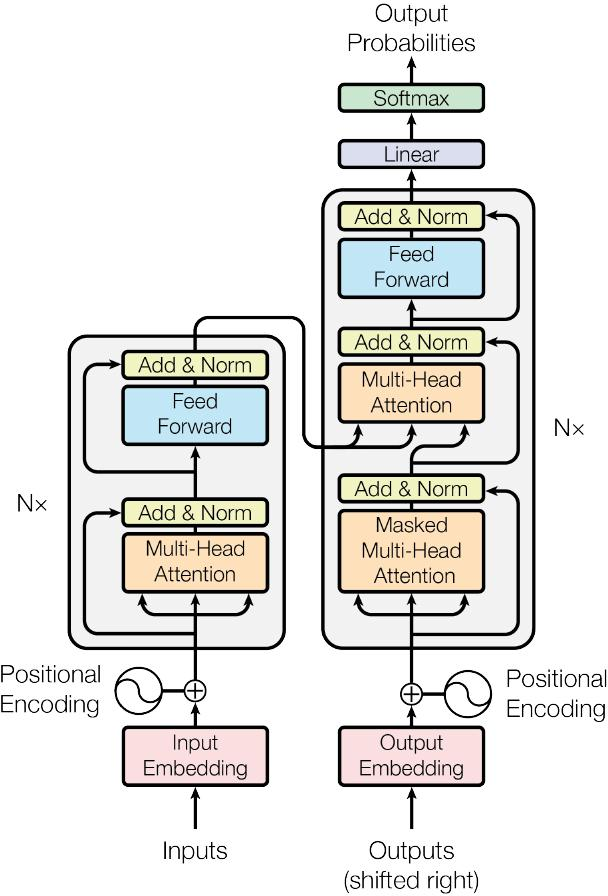

In [17]:
import base64
from IPython.display import Image, display

def display_base64_image(base64_code):
    # Decode the base64 string to binary
    image_data = base64.b64decode(base64_code)
    # Display the image
    display(Image(data=image_data))

display_base64_image(images[0])

In [18]:
from pydantic import BaseModel, Field

class NodeSummaryResponse(BaseModel):
    """
    Response model for summary object of a node 
    """
    summary: str = Field(
        ...,
        description="A detailed summary of the table or text. 8 minimum to 10 sentences max.")

SYSTEM_PROMPT = """
You are an expert assistant tasked with summarizing text and tables.
"""

class NodeSummariser:
    """
    Enhanced document summariser
    """
    def __init__(self, client):
        self.client = client

    def summarise(self, document_text: str) -> tuple[NodeSummaryResponse, dict]:
        """
        Summarise a document text
        """
        try:
            summary, completion = self.client.chat.completions.create_with_completion(
                system=SYSTEM_PROMPT,
                messages=[
                    {
                        "role": "user",
                        "content": f"Give a very detailed summary of the following text or table: {document_text}. \
                            Respond only with the summary, no additionnal comment. Do not start your message by \
                            saying 'Here is a summary' or anything like that. Just give the summary as it is. Don't even \
                            mention the title of the source."
                    }
                    ],
                response_model = NodeSummaryResponse
            )

            return summary, completion
        except Exception as e:
            return e

In [19]:
from dotenv import load_dotenv

load_dotenv(verbose=True, dotenv_path=".env")

True

In [20]:
import os
import anthropic
import instructor

client = anthropic.AnthropicBedrock(
    aws_access_key=os.getenv("AWS_ACCESS_KEY_ID"),
    aws_secret_key=os.getenv("AWS_SECRET_ACCESS_KEY"),
    aws_session_token=os.getenv("AWS_SESSION_TOKEN"),
    aws_region=os.getenv("AWS_DEFAULT_REGION"),
)

MODEL_ID_HAIKU = "anthropic.claude-3-haiku-20240307-v1:0"
MODEL_ID_SONNET = "anthropic.claude-3-5-sonnet-20241022-v2:0"
USE_MODEL = MODEL_ID_SONNET
# USE_MODEL = MODEL_ID_HAIKU

# Regarding the LLM model choice, I would start with the cheapest option (Haiku) first. Depending on the tasks, the smallest 
# model might be sufficient. You will have to do some trial and error here. I found that the smallest model at times will have
# difficulty following certain instructions. For example, asking the LLM to summarise a body of text and constraining the
# summary say from minimum 100 and maximum 500 characters, the smallest model will sometimes fail to generate a summary
# that is within the character count constraints. In such cases, you might have to try a larger model.

# we are using Instructor (https://github.com/instructor-ai/instructor)
instructor_client = instructor.from_anthropic(
    client,
    max_tokens=1024,
    model=USE_MODEL
)



In [21]:
from pydantic import BaseModel

# Define your desired output structure
class UserInfo(BaseModel):
    name: str
    age: int

user_info = instructor_client.chat.completions.create(
    response_model=UserInfo,
    messages=[{"role": "user", "content": "John Doe is 30 years old."}]
    )

print(user_info.name)
#> John Doe
print(user_info.age)
#> 30

John Doe
30


In [22]:
from IPython.display import Markdown, display

for i, item in enumerate(composites):
    node, _ = NodeSummariser(instructor_client).summarise(item)
    display(Markdown(f"**Node {i+1}**:"))
    display(Markdown(node.summary))

**Node 1**:

This seminal research paper introduces a groundbreaking neural network architecture called the Transformer, which revolutionized sequence transduction models by relying solely on attention mechanisms. The work represents a significant departure from traditional approaches that used recurrent or convolutional neural networks with encoder-decoder structures. The authors demonstrate the Transformer's superior performance on machine translation tasks, achieving a BLEU score of 28.4 on English-to-German translation and setting a new state-of-the-art score of 41.8 on English-to-French translation. These results were achieved with significantly reduced training time - just 3.5 days on eight GPUs, representing a fraction of the computational resources required by previous models. The architecture's versatility is proven through its successful application to English constituency parsing, both with abundant and limited training data. The paper is a collaborative effort of researchers primarily from Google Brain and Google Research, with equal contributions from Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Łukasz Kaiser, and Illia Polosukhin. Each author played crucial roles, from Jakob's initial proposal to replace RNNs with self-attention to the implementation and optimization work done by various team members.

**Node 2**:

The text introduces a groundbreaking architecture called the Transformer, which revolutionizes sequence modeling and transduction tasks by completely abandoning recurrent neural networks in favor of attention mechanisms. Traditional recurrent models, while effective, suffer from inherent sequential computation limitations that prevent parallelization within training examples. The Transformer architecture addresses this limitation by relying solely on attention mechanisms to capture global dependencies between input and output sequences. This innovation allows for significantly more parallel processing and achieves state-of-the-art translation results with just twelve hours of training on eight P100 GPUs. The text also discusses previous attempts to reduce sequential computation, such as the Extended Neural GPU, ByteNet, and ConvS2S, which use convolutional neural networks but face challenges in learning long-distance dependencies. Self-attention, a key component of the Transformer, has proven successful in various tasks including reading comprehension and abstractive summarization. The Transformer distinguishes itself as the first transduction model to entirely forgo both sequence-aligned RNNs and convolution in favor of self-attention for computing input and output representations. The architecture effectively maintains a constant number of operations between any two input or output positions, though this comes with some resolution trade-offs that are addressed through Multi-Head Attention.

**Node 3**:

The text describes a neural sequence transduction model called the Transformer that utilizes an encoder-decoder architecture. The encoder converts input symbol sequences into continuous representations, while the decoder generates output sequences one element at a time in an auto-regressive manner. Both the encoder and decoder are constructed with stacks of six identical layers, with each stack implementing different types of attention mechanisms and neural network components. The encoder layer contains two sub-layers: a multi-head self-attention mechanism and a position-wise feed-forward network, both wrapped with residual connections and layer normalization. The decoder layer is similar but includes a third sub-layer that performs multi-head attention over the encoder's output. A crucial feature of the decoder is its masked self-attention mechanism, which prevents positions from attending to subsequent positions, ensuring predictions depend only on known previous outputs. The model maintains a consistent dimension of 512 throughout all sub-layers and embedding layers to facilitate residual connections. The architecture is visually represented in Figure 1, showing the detailed structure of both the encoder and decoder components, including their embedding layers and positional encodings.

**Node 4**:

The text describes a fundamental concept in neural networks where attention functions map queries and key-value pairs to outputs through weighted calculations. The specific focus is on "Scaled Dot-Product Attention," which processes queries and keys of dimension dk, along with values of dimension dv. The computation involves calculating dot products between queries and keys, scaling them by a factor of 1/√dk, and applying a softmax function to determine weights for values. In practical applications, queries, keys, and values are handled simultaneously as matrices Q, K, and V, with the output matrix calculated using a specific formula. The text compares two primary attention mechanisms: additive attention and dot-product attention. While both have similar theoretical complexity, dot-product attention proves more efficient due to its optimization potential through matrix multiplication. The scaling factor 1/√dk is particularly crucial for larger dk values, as it prevents the dot products from growing too large and pushing the softmax function into areas with extremely small gradients. Without this scaling, additive attention typically performs better than dot-product attention for larger dk values.

**Node 5**:

The text describes a sophisticated attention mechanism called Multi-Head Attention, where queries, keys, and values are linearly projected h different times with learned projections to create multiple attention heads. Each projection operates in parallel, producing dv-dimensional outputs that are later concatenated and projected again to yield final values. The purpose of using multiple heads is to enable the model to simultaneously process information from different representation subspaces at different positions, overcoming the limitations of single-head attention's averaging effect. The mechanism employs 8 parallel attention heads, with each head using dimensions dk = dv = dmodel/h = 64, maintaining computational efficiency comparable to single-head attention. The implementation involves specific parameter matrices for projections, with WQ, WK, WV, and WO handling different dimensional transformations. The Transformer architecture applies this multi-head attention in three distinct ways: encoder-decoder attention where queries come from the decoder and keys/values from the encoder, self-attention in the encoder where all components derive from the previous encoder layer, and masked self-attention in the decoder that prevents leftward information flow to maintain auto-regression. To manage the scale of dot products, the components of queries and keys are designed as independent random variables with mean 0 and variance 1.

**Node 6**:

The text describes several key components of a neural network architecture, particularly focusing on position-wise feed-forward networks, embeddings, and positional encoding mechanisms. Each layer in the encoder and decoder contains a fully connected feed-forward network that applies two linear transformations with a ReLU activation, operating independently on each position. The network maintains input and output dimensionality of 512 while utilizing an inner-layer dimensionality of 2048. The model employs learned embeddings to convert input and output tokens into vectors, sharing weights between embedding layers and pre-softmax linear transformation. The architecture implements positional encoding to account for sequence order, using sine and cosine functions of different frequencies, with wavelengths forming a geometric progression from 2π to 10000 · 2π. A comparative analysis of different layer types is presented, examining their complexity, sequential operations, and maximum path lengths, where self-attention demonstrates O(n²·d) complexity with O(1) sequential operations. The authors note that while learned positional embeddings were also tested, they produced similar results to the sinusoidal version, with the latter being chosen for its potential to extrapolate to longer sequence lengths than those encountered during training.

**Node 7**:

The text compares self-attention layers with recurrent and convolutional layers in sequence transduction tasks, evaluating them based on three key criteria: computational complexity, parallelization capability, and path length for long-range dependencies. Self-attention layers demonstrate superior performance by connecting all positions with constant sequential operations, while recurrent layers require O(n) sequential operations. In terms of computational efficiency, self-attention outperforms recurrent layers when sequence length is smaller than representation dimensionality, which is common in machine translation applications. Convolutional layers present higher computational costs than recurrent layers by a factor of k, though separable convolutions can reduce this complexity to O(k · n · d + n · d2). The architecture of self-attention allows for shorter paths between input and output positions, facilitating better learning of long-range dependencies. For very long sequences, self-attention can be modified to consider only a neighborhood of size r, though this increases maximum path length to O(n/r). Additionally, self-attention offers enhanced interpretability, with attention heads demonstrating distinct specialized functions and behaviors related to syntactic and semantic sentence structure.

**Node 8**:

The training process was conducted on the WMT 2014 English-German dataset with 4.5 million sentence pairs and English-French dataset containing 36M sentences, using byte-pair encoding and word-piece vocabulary respectively. Training batches were organized by sequence length, with each batch containing approximately 25,000 source and target tokens. The hardware setup consisted of one machine with 8 NVIDIA P100 GPUs, where base models took 0.4 seconds per training step over 100,000 steps (12 hours), while bigger models required 1.0 second per step for 300,000 steps (3.5 days). The Adam optimizer was employed with specific parameters, implementing a learning rate that increased linearly for the first 4000 steps and then decreased proportionally to the inverse square root of step number. Three regularization techniques were utilized: residual dropout with a rate of 0.1, applied to sub-layer outputs and embedding sums, and label smoothing with a value of 0.1. The Transformer model achieved superior BLEU scores compared to previous state-of-the-art models, with the base model reaching 27.3/38.1 and the big model achieving 28.4/41.8 for English-German/English-French translations respectively, while requiring significantly fewer FLOPs for training.

**Node 9**:

The research presents significant breakthroughs in machine translation tasks using the Transformer model architecture. For the WMT 2014 English-to-German translation, the big Transformer model achieved a state-of-the-art BLEU score of 28.4, surpassing previous models by more than 2.0 BLEU points. The training process took 3.5 days using 8 P100 GPUs, with even the base model outperforming existing published models at a fraction of the cost. In the English-to-French translation task, their big model reached a BLEU score of 41.0, exceeding all previous single models while using less than 25% of the training cost compared to the previous state-of-the-art. The research team employed specific methodologies, including averaging the last 5 checkpoints for base models and 20 checkpoints for big models, using beam search with a beam size of 4 and length penalty of 0.6. Various architectural variations were tested on the base model, analyzing components like model dimensions, attention heads, and dropout rates, with results documented in Table 3. The experiments thoroughly explored different configurations, including changes in model depth, feed-forward dimensions, and attention head counts, demonstrating how these modifications affected performance metrics such as perplexity, BLEU scores, and parameter counts.

**Node 10**:

The text presents experimental results and analysis of the Transformer model's performance across different configurations and tasks. In the initial experiments, researchers investigated the impact of varying attention heads and dimensions while maintaining constant computation, finding that both single-head attention and too many heads decreased performance. The study revealed that reducing attention key size negatively affected model quality, suggesting that the dot product compatibility function might be suboptimal. Larger models demonstrated better performance, and dropout proved crucial in preventing overfitting. When testing English constituency parsing, a 4-layer Transformer with dmodel=1024 was trained on both the Wall Street Journal portion (40K sentences) and in a semi-supervised setting with 17M sentences. The model achieved impressive results, outperforming most previous approaches including the BerkeleyParser when trained only on WSJ data. In the semi-supervised setting, the Transformer achieved a state-of-the-art F1 score of 92.7, demonstrating strong generalization capabilities even without task-specific tuning. The model implemented beam search with size 21 and α=0.3 for both training scenarios.

**Node 11**:

The Transformer represents a groundbreaking advancement in sequence transduction models, distinguished by its complete reliance on attention mechanisms rather than traditional recurrent layers in encoder-decoder architectures. This innovative model demonstrates superior performance in translation tasks, achieving new state-of-the-art results in both WMT 2014 English-to-German and English-to-French translations, while being significantly faster to train than its recurrent or convolutional counterparts. The research team expresses enthusiasm about expanding the application of attention-based models beyond text, with plans to explore their potential in handling different input and output modalities such as images, audio, and video. They specifically aim to investigate local, restricted attention mechanisms for efficiently processing larger inputs and outputs, while also working towards making the generation process less sequential. The work has been made publicly accessible through their code repository on GitHub, with the team acknowledging the valuable contributions of colleagues Nal Kalchbrenner and Stephan Gouws. The paper concludes with an extensive bibliography of 35 references, showcasing the comprehensive theoretical foundation underlying this research and its position within the broader field of machine learning and neural network architectures.

**Node 12**:

The figures presented showcase detailed visualizations of attention mechanisms in a neural network model, specifically focusing on layer 5 of a 6-layer encoder. Figure 3 demonstrates how the attention mechanism handles long-distance dependencies, particularly highlighting how different attention heads track the relationship between the word "making" and its related phrase completion "more difficult." Multiple colored lines represent different attention heads, showing their distinct focus patterns. Figure 4 illustrates two attention heads' involvement in anaphora resolution, with a particular emphasis on how the word "its" is processed. The visualization shows remarkably sharp attention patterns for this specific word, indicating precise reference resolution. Figure 5 reveals how different attention heads have evolved to perform distinct structural tasks within sentence processing. Two examples from layer 5 demonstrate how these heads have learned to identify and process different aspects of sentence structure independently. The visualizations provide clear evidence that individual attention heads specialize in specific linguistic tasks, from tracking dependencies to resolving references and analyzing sentence structure. The referenced papers span topics from computer vision architecture to neural machine translation and constituent parsing, though the figures focus specifically on attention mechanism analysis.

In [23]:
for i, item in enumerate(tables_info):
    node, _ = NodeSummariser(instructor_client).summarise(item)
    display(Markdown(f"**Table {i+1}**:"))
    display(Markdown(item["text_as_html"]))
    display(Markdown(f"**Table {i+1} Summary**:"))
    display(Markdown(node.summary))

**Table 1**:

<table><thead><tr><th>Layer Type</th><th>Complexity per Layer</th><th>Sequential Operations</th><th>Maximum Path Length</th></tr></thead><tbody><tr><td>Self-Attention</td><td>O(n? - d)</td><td>O(1)</td><td>O(1)</td></tr><tr><td>Recurrent</td><td>O(n- d?)</td><td>O(n)</td><td>O(n)</td></tr><tr><td>Convolutional</td><td>O(k-n-d?)</td><td>O(1)</td><td>O(logy(n))</td></tr><tr><td>Self-Attention (restricted)</td><td>O(r-n-d)</td><td>ol)</td><td>O(n/r)</td></tr></tbody></table>

**Table 1 Summary**:

The table compares different neural network layer types and their computational characteristics across four key metrics. Self-attention layers have a complexity per layer of O(n² - d), offer O(1) sequential operations, and maintain a maximum path length of O(1). Recurrent layers show a complexity of O(n - d²), require O(n) sequential operations, and have a maximum path length of O(n). Convolutional layers demonstrate a complexity of O(k-n-d²), feature O(1) sequential operations, and have a maximum path length of O(logy(n)). Restricted self-attention layers operate with a complexity of O(r-n-d), have ol sequential operations, and maintain a maximum path length of O(n/r). These characteristics highlight the trade-offs between computational efficiency, parallelization potential, and information flow capacity across different architectural choices in neural networks.

**Table 2**:

<table><thead><tr><th>Model</th><th>EN-DE</th><th>BLEU EN-FR</th><th>Training EN-DE</th><th>Cost (FLOPs) EN-FR</th></tr></thead><tbody><tr><td colspan="5">ByteNet [18] 23.75</td></tr><tr><td>Deep-Att + PosUnk</td><td></td><td>39.2</td><td></td><td>1.0 - 107°</td></tr><tr><td>GNMT + RL 8]</td><td>24.6</td><td>39.92</td><td>2.3-10!9</td><td>1.4-1070</td></tr><tr><td>ConvS28S [9]</td><td>25.16</td><td>40.46</td><td>9.6-10'%</td><td>1.5-1070</td></tr><tr><td>MoE</td><td>26.03</td><td>40.56</td><td>2.0-10'9</td><td>1.2. 1079</td></tr><tr><td>Deep-Att + PosUnk Ensemble</td><td></td><td>40.4</td><td></td><td>8.0 - 107°</td></tr><tr><td>GNMT + RL Ensemble (33</td><td>26.30</td><td>41.16</td><td>1.8-1079</td><td>1.1- 1074</td></tr><tr><td>ConvS2S Ensemble [9]</td><td>26.36</td><td>41.29</td><td>7.7-10'9</td><td>1.2.10?!</td></tr><tr><td>Transformer (base model)</td><td>27.3</td><td>38.1</td><td>3.3-</td><td>1018</td></tr><tr><td>Transformer (big)</td><td>28.4</td><td>41.8</td><td>2.3.</td><td>1019</td></tr></tbody></table>

**Table 2 Summary**:

The table presents performance metrics and computational costs for various machine translation models comparing their effectiveness in English-to-German (EN-DE) and English-to-French (EN-FR) translations using BLEU scores. ByteNet achieves a BLEU score of 23.75 for EN-DE, while Deep-Att + PosUnk achieves 39.2 for EN-FR. The GNMT + RL model demonstrates improved performance with 24.6 for EN-DE and 39.92 for EN-FR, requiring computational resources of 2.3-10!9 and 1.4-1070 FLOPs respectively. ConvS28S shows further improvements with scores of 25.16 and 40.46, while MoE reaches 26.03 and 40.56. Ensemble models generally outperform their single-model counterparts, with GNMT + RL Ensemble achieving 26.30 and 41.16, and ConvS2S Ensemble reaching 26.36 and 41.29. The Transformer models introduce significant improvements, with the base model scoring 27.3 and 38.1, and the big model achieving the highest scores of 28.4 and 41.8, demonstrating the evolution and advancement of machine translation technologies.

**Table 3**:

<table><thead><tr><th></th><th>N</th><th>dyoast</th><th>de</th><th>Rh</th><th>de</th><th>dy</th><th>Parop</th><th>ets</th><th>Game</th><th>| deny</th><th></th><th>dev).</th></tr></thead><tbody><tr><td>base</td><td>| 6</td><td>512</td><td>2048</td><td>8</td><td>64</td><td>64</td><td>0.1</td><td>O01</td><td>100K</td><td>| 4.92</td><td>25.8</td><td>65</td></tr><tr><td rowspan="4">(A)</td><td></td><td></td><td></td><td>1</td><td>512</td><td>512</td><td></td><td></td><td></td><td>5.29</td><td>24.9</td><td></td></tr><tr><td></td><td></td><td></td><td>4</td><td>128</td><td>128</td><td></td><td></td><td></td><td>5.00</td><td>25.5</td><td></td></tr><tr><td></td><td></td><td></td><td>16</td><td>32</td><td>32</td><td></td><td></td><td></td><td>491</td><td>25.8</td><td></td></tr><tr><td></td><td></td><td></td><td>32</td><td>16 =</td><td>16</td><td></td><td></td><td></td><td>5.01</td><td>25.4</td><td></td></tr><tr><td rowspan="2">(B)</td><td></td><td></td><td></td><td></td><td>16</td><td></td><td></td><td></td><td></td><td>5.16</td><td>9 25.1</td><td>58</td></tr><tr><td></td><td></td><td></td><td></td><td>32</td><td></td><td></td><td></td><td></td><td>5.01</td><td>25.4</td><td>60</td></tr><tr><td rowspan="7">(C)</td><td>2</td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td>6.11</td><td>23.7</td><td>36</td></tr><tr><td>4</td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td>5.19</td><td>25.3</td><td>50</td></tr><tr><td>8</td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td>4.88</td><td>25.5</td><td>80</td></tr><tr><td></td><td>256</td><td></td><td></td><td>3232</td><td></td><td></td><td></td><td></td><td>5.75</td><td>24.5</td><td>28</td></tr><tr><td></td><td>1024</td><td></td><td></td><td>128</td><td>128</td><td></td><td></td><td></td><td>4.66</td><td>26.0</td><td>168</td></tr><tr><td></td><td></td><td>1024</td><td></td><td></td><td></td><td></td><td></td><td></td><td>5.12</td><td>25.4</td><td>53</td></tr><tr><td></td><td></td><td>4096</td><td></td><td></td><td></td><td></td><td></td><td></td><td>4.75</td><td>26.2</td><td>90</td></tr><tr><td rowspan="4">()</td><td></td><td></td><td></td><td></td><td></td><td></td><td>0.0</td><td></td><td></td><td>5.77</td><td>24.6</td><td></td></tr><tr><td></td><td></td><td></td><td></td><td></td><td></td><td>0.2</td><td></td><td></td><td>4.95</td><td>25.5</td><td></td></tr><tr><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td>0.0</td><td></td><td>467</td><td>25.3</td><td></td></tr><tr><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td>0.2</td><td></td><td>5.47</td><td>25.7</td><td></td></tr><tr><td>(E)</td><td></td><td></td><td>positional</td><td>embedding</td><td></td><td>instead of</td><td>sinusoids</td><td></td><td></td><td>4.92</td><td>25.7</td><td></td></tr><tr><td>big</td><td>| 6</td><td>1024</td><td>4096</td><td>16</td><td></td><td></td><td>0.3</td><td></td><td>300K</td><td>| 4.33</td><td>26.4</td><td>213</td></tr></tbody></table>

**Table 3 Summary**:

The table appears to show experimental results with various parameters and configurations. The baseline configuration includes values of 512 for dyoast, 2048 for de, 8 for Rh, 64 for both de and dy parameters, 0.1 for Parop, 0.01 for ets, and 100K for Game. Section (A) explores different values of Rh (1, 4, 16, 32) while keeping other parameters constant. Section (B) tests variations in de values (16, 32). Section (C) experiments with different values of N (2, 4, 8) and dyoast (256, 1024, 4096). Section (D) examines different values for Parop (0.0, 0.2) and ets (0.0, 0.2). Finally, section (E) tests positional embedding instead of sinusoids. A "big" configuration is also shown with larger values: 1024 for dyoast, 4096 for de, 16 for Rh, and 300K for Game. The results are measured in multiple metrics including deny and dev values.

**Table 4**:

<table><thead><tr><th>Parser</th><th>Training</th><th>WSJ 23 F1</th></tr></thead><tbody><tr><td>Vinyals &amp; Kaiser el al. (2014)</td><td>WSJ only, discriminative</td><td>88.3</td></tr><tr><td>Petrov et al. (2006)</td><td>WSJ only, discriminative</td><td>90.4</td></tr><tr><td>Zhu et al. (2013) (40)</td><td>WSJ only, discriminative</td><td>90.4</td></tr><tr><td>Dyer et al. (2016)</td><td>WSJ only, discriminative</td><td>91.7</td></tr><tr><td>Transformer (4 layers)</td><td>WSJ only, discriminative</td><td>91.3</td></tr><tr><td>Zhu et al. (2013) [40]</td><td>semi-supervised</td><td>913</td></tr><tr><td>Huang &amp; Harper (2009)</td><td>semi-supervised</td><td>91.3</td></tr><tr><td>McClosky et al. (2006)</td><td>semi-supervised</td><td>92.1</td></tr><tr><td>Vinyals &amp; Kaiser el al. (2014)</td><td>semi-supervised</td><td>92.1</td></tr><tr><td>Transformer (4 layers)</td><td>semi-supervised</td><td>92.7</td></tr><tr><td>Luong et al. (2015) 23]</td><td>multi-task</td><td>93.0</td></tr><tr><td>Dyer et al. (2016)</td><td>generative</td><td>93.3</td></tr></tbody></table>

**Table 4 Summary**:

The data presents a comparison of various parsing models and their performance on the Wall Street Journal (WSJ) section 23, measured by F1 scores. The models are categorized based on their training approaches: discriminative WSJ-only training, semi-supervised training, multi-task learning, and generative training. Among the WSJ-only discriminative models, Dyer et al. (2016) achieves the highest score of 91.7, followed by the Transformer model at 91.3. The semi-supervised training methods generally show improved performance, with the Transformer model leading at 92.7, followed by McClosky et al. (2006) and Vinyals & Kaiser et al. (2014) both at 92.1. Luong et al. (2015) using multi-task learning achieves a score of 93.0, while Dyer et al. (2016) with generative training reaches the highest overall score of 93.3. The progression of scores across different training methods demonstrates that more sophisticated training approaches tend to yield better parsing performance.

In [24]:
len(images)

7

In [25]:
from pydantic import BaseModel, Field

class ImageDescriptionResponse(BaseModel):
    """
    Response model for description of an image 
    """
    description: str = Field(
        ...,
        description="A detailed description of a given image. 8 minimum to 10 sentences max.")

SYSTEM_PROMPT = """
You are an expert assistant tasked with creating descriptions of images. Describe the image in detail. For context \
the image is part of a research paper explaining the transformers architecture. Be specific about graphs, such as bar plots.
"""

class ImageDescriber:
    """
    Enhanced image describer
    """
    def __init__(self, client):
        self.client = client

    def describe(self, base64_image: str) -> tuple[ImageDescriptionResponse, dict]:
        """
        Return the description of an image
        """
        try:
            input_image = instructor.Image.from_raw_base64(base64_image)
            
            description, completion = self.client.chat.completions.create_with_completion(
                system=SYSTEM_PROMPT,
                messages=[
                    {
                        "role": "user",
                        "content": ["Describe in detail what is in this image?", input_image]
                    }
                ],
                response_model = ImageDescriptionResponse
            )

            return description, completion
        except Exception as e:
            return e

**Image 1:**

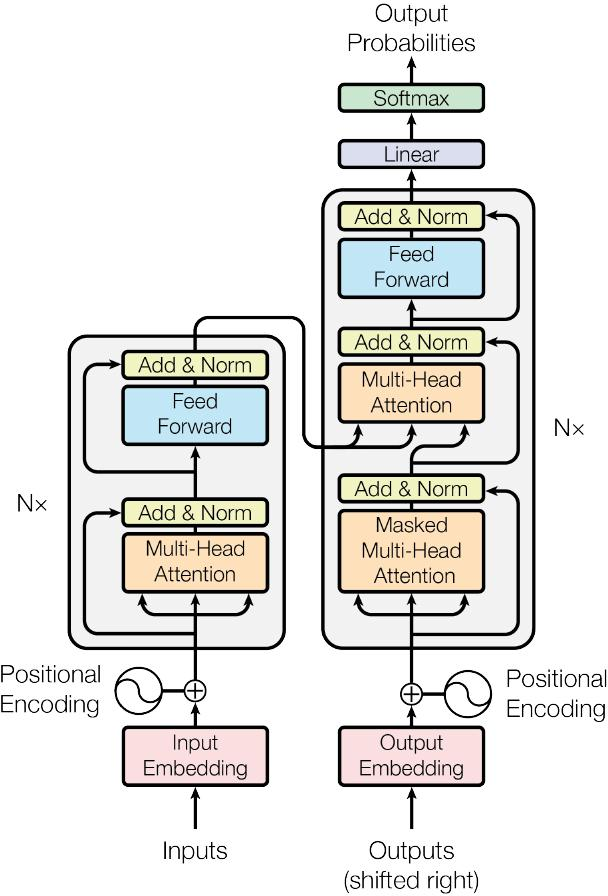

**Image 1 Description**:

The image shows a detailed architectural diagram of a Transformer model, which is a key architecture in natural language processing. The diagram is organized vertically, showing the flow of data from inputs at the bottom to output probabilities at the top. The structure is divided into two main paths - an encoder stack (left) and a decoder stack (right), each marked with "Nx" indicating multiple repeated layers.

The input path begins with "Input Embedding" at the bottom left, combined with "Positional Encoding" through an addition operation. This feeds into a repeating stack of blocks containing "Multi-Head Attention" and "Feed Forward" layers, each preceded by "Add & Norm" operations. The connections between these components are shown with clear arrows indicating the flow of information.

The right side (decoder) has a similar but more complex structure, featuring three main components in each block: "Masked Multi-Head Attention," regular "Multi-Head Attention," and "Feed Forward" layers. Each of these is also preceded by "Add & Norm" operations. The decoder side begins with "Output Embedding" and "Positional Encoding" at the bottom right, marked as "Outputs (shifted right)."

The top of the architecture shows the final processing stages: a "Linear" layer followed by a "Softmax" operation, which produces the final "Output Probabilities." The diagram uses a pleasant color scheme with light blues, peaches, and pale yellows to distinguish different components, and all elements are clearly labeled with black text.

**Image 2:**

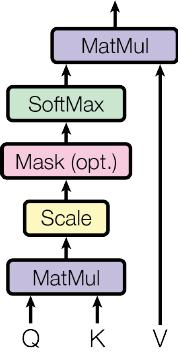

**Image 2 Description**:

The image shows a vertical flow diagram illustrating the attention mechanism components in transformer architecture. The diagram flows from bottom to top with clear directional arrows connecting each component. At the bottom, there are three input vectors labeled "Q", "K", and "V" (representing Query, Key, and Value vectors). These inputs feed into the first "MatMul" (Matrix Multiplication) operation, represented by a purple rectangular box. Moving upward, the next component is a yellow box labeled "Scale". Above that is a pink box showing "Mask (opt.)" indicating an optional masking operation. Following the mask, there's a green box containing "SoftMax" operation. Finally, at the top of the diagram is another purple "MatMul" box. The entire structure is connected by arrows showing the flow of data through these sequential operations. The diagram effectively demonstrates the scaled dot-product attention mechanism, which is a fundamental component of transformer models. The color coding helps distinguish different types of operations, with computational steps shown in purple, normalization in yellow, masking in pink, and activation function in green.

**Image 3:**

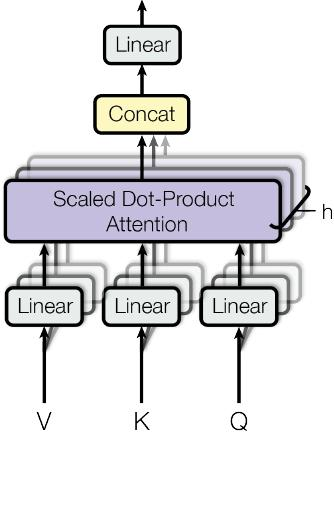

**Image 3 Description**:

The image shows a detailed architectural diagram of a multi-head attention mechanism, which is a key component of transformer models in deep learning. The diagram is structured vertically with data flowing from bottom to top. At the bottom, there are three input vectors labeled "V", "K", and "Q" (representing Value, Key, and Query vectors respectively). Each of these inputs feeds into separate "Linear" transformation layers, represented by rectangular boxes. Above the linear layers, there are multiple parallel "Scaled Dot-Product Attention" blocks, indicated by stacked purple rectangular boxes, suggesting multiple attention heads operating in parallel. The number of parallel attention heads is denoted by "h" on the right side of these stacked blocks. The outputs from all attention heads are then fed into a "Concat" layer, represented by a beige rectangular box, which combines the information from all heads. Finally, at the top of the diagram, there is another "Linear" transformation layer that produces the final output. The connections between components are shown with gray arrows, clearly illustrating the flow of information through the network. The diagram effectively captures the parallel processing nature of multi-head attention and its hierarchical structure.

**Image 4:**

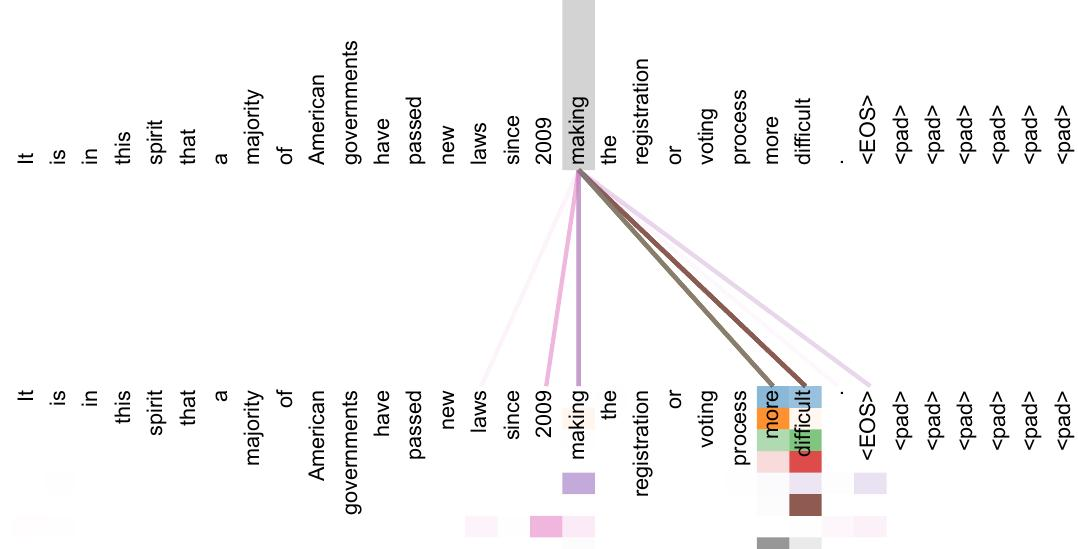

**Image 4 Description**:

The image shows an attention visualization diagram from a transformer model, specifically displaying the attention patterns for different words in a sentence. The visualization consists of two identical text sequences arranged vertically, with attention lines connecting words between them. The text appears to be a partial sentence starting with words like "It is in this spirit that..." and continues with phrases about American governments and laws passed since 2009. The attention connections are shown as colored lines in varying shades of pink, brown, and gray, with the intensity of the colors likely representing the strength of the attention weights. At the right end of the sequence, there are special tokens marked as "<EOS>" and multiple "<pad>" tokens, which are common in transformer architectures to handle varying sequence lengths. There's also a notable highlighted section in the middle of the bottom sequence with color-coded boxes in green, orange, and red, suggesting particular emphasis on certain words or tokens in that region. The visualization demonstrates how different words in the sequence attend to or connect with other words, which is a fundamental aspect of how transformer models process and understand text relationships.

**Image 5:**

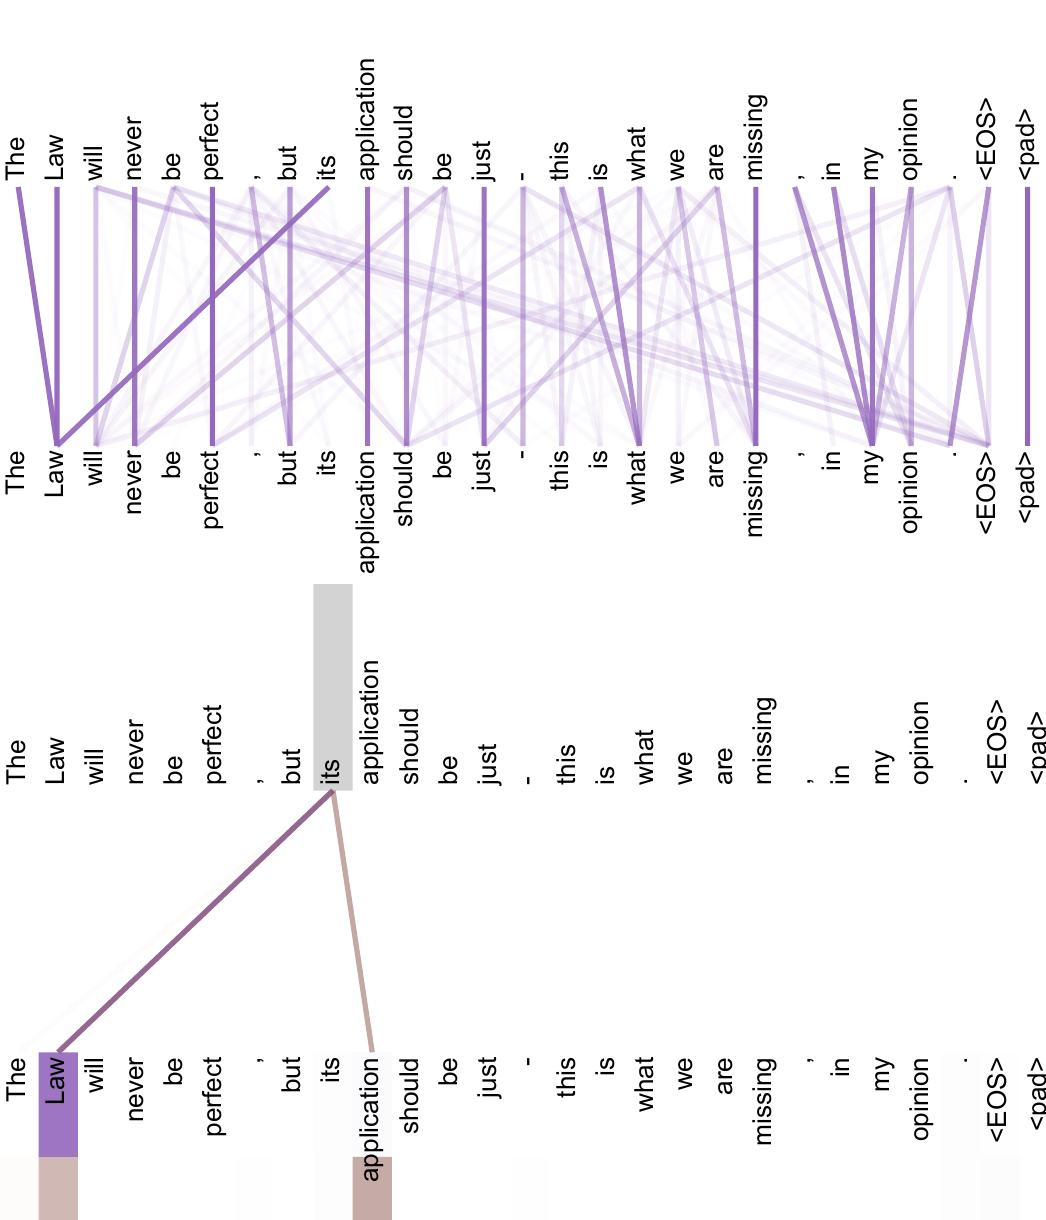

**Image 5 Description**:

The image appears to be a visualization of attention patterns or connections in a transformer model's self-attention mechanism. It consists of three identical rows of text tokens, with the tokens being individual words and special tokens like "<EOS>" and "<pad>" arranged horizontally. The visualization shows attention connections represented by purple lines of varying opacity connecting different words across the sequence. The middle row features a highlighted gray block on the word "application", while the bottom row shows highlighted blocks on both "Law" and "application". The purple lines demonstrate how different words attend to or connect with other words in the sequence, with darker lines indicating stronger attention weights. The text appears to be a partial sentence containing words like "The", "Law", "will", "never", "be", "perfect", "but", "its", "application", "should", and several other tokens. This type of visualization is commonly used in transformer architecture papers to demonstrate how the self-attention mechanism allows different parts of the input sequence to attend to other parts dynamically.

**Image 6:**

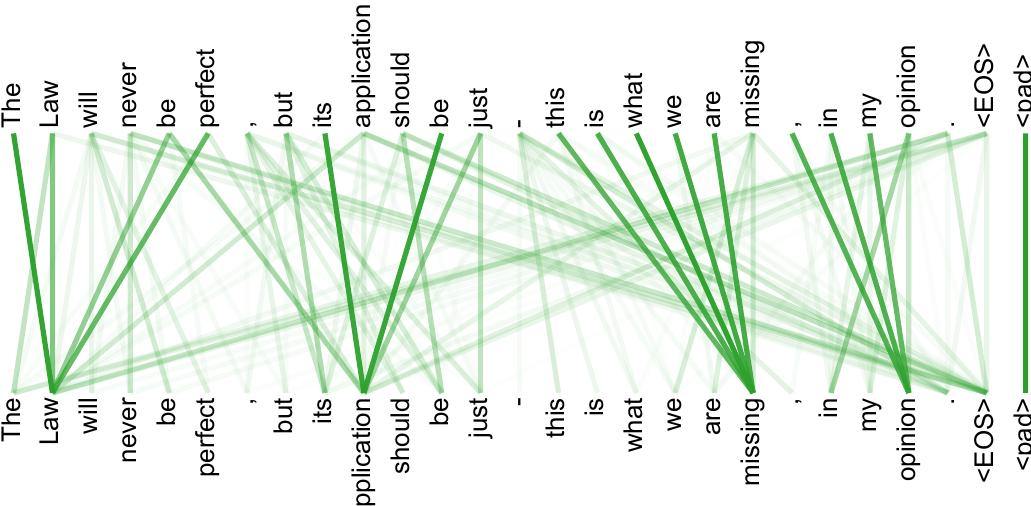

**Image 6 Description**:

The image shows an attention visualization diagram, specifically displaying self-attention patterns in what appears to be a transformer architecture. The visualization is rendered in shades of green against a white background, with words arranged in two parallel rows at the top and bottom of the image. The connections between these words are represented by green lines of varying opacity, where darker green lines indicate stronger attention weights between the corresponding tokens. Some of the visible words include "The", "Law", "will", "never", "be", "perfect", "application", "should", and several other tokens including some special tokens like "<EOS>" and "<pad>" at the end. The attention pattern shows how each word in the sequence attends to other words, creating a complex network of interconnected lines. The varying intensity of the green connections helps visualize which words have stronger relationships or dependencies in the context of the sentence. This type of visualization is commonly used in transformer-based models to understand how the self-attention mechanism processes and relates different parts of the input sequence. The clear structure and symmetrical arrangement of words at top and bottom makes it easy to trace the attention patterns between any two tokens in the sequence.

**Image 7:**

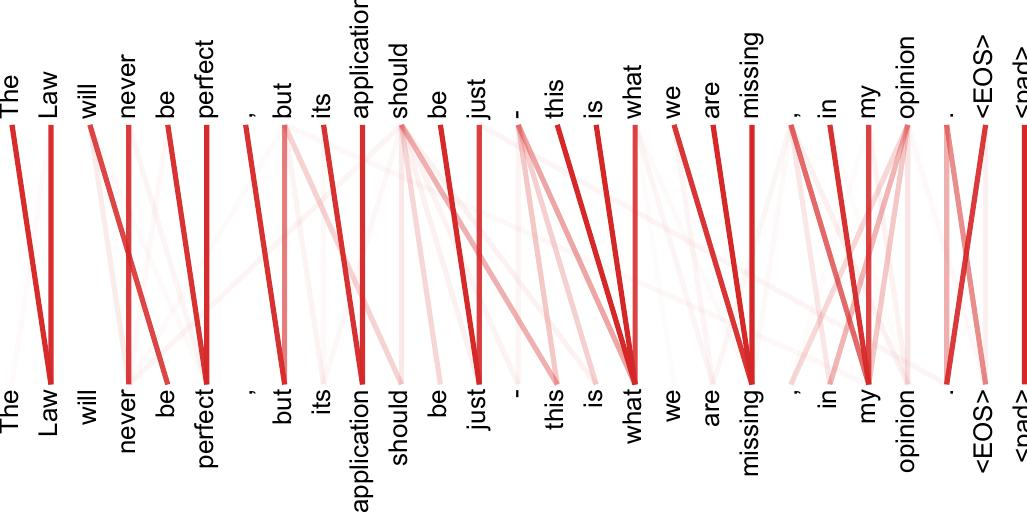

**Image 7 Description**:

The image shows an attention visualization matrix or attention map commonly used in transformer architectures to illustrate the relationships between words in a sequence. The visualization is presented as a series of red lines connecting words on the top and bottom of the image, with varying line intensities or weights. The words appear to be part of an English sentence or text sequence, with tokens like "The", "Law", "will", "never", "be", "perfect", and others visible at both the top and bottom of the visualization. The lines connecting these words represent attention weights, where darker or more intense red lines indicate stronger attention connections between the corresponding words. Some connections appear stronger than others, as indicated by the varying intensity of the red lines. This type of visualization is typically used to show how the self-attention mechanism in transformers allows each word to attend to other words in the sequence. The pattern of connections reveals which words the model considers most relevant or related to each other during processing. The symmetric nature of the visualization, with words appearing both at the top and bottom, is characteristic of self-attention visualizations in transformer models.

In [26]:
from IPython.display import Markdown, display

for i, item in enumerate(images):
    image_node, _ = ImageDescriber(instructor_client).describe(item)
    display(Markdown(f"**Image {i+1}:**"))
    display_base64_image(item)
    display(Markdown(f"**Image {i+1} Description**:"))
    display(Markdown(image_node.description))